In [1]:
import pandas as pd

In [2]:
data_train=pd.read_csv('real_estate_train.csv')

In [3]:
data_test=pd.read_csv('real_estate_test.csv')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [6]:
#Заполним пустые значения

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
 ВЫВОД: можно заполнить 'No alley access'

In [7]:
data_train['Alley'].fillna('No alley access', inplace=True)
data_test['Alley'].fillna('No alley access', inplace=True)

MasVnrType 1452 non-null object MasVnrArea 1452 non-null float64

In [8]:
data_train['MasVnrType'].value_counts(normalize=True, dropna=False)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
NaN        0.005479
Name: MasVnrType, dtype: float64

In [9]:
# у 60% объектов стен из кладочного шпона нет, пропущенные значения можно заменить как None

In [10]:
data_train['MasVnrType'].fillna('None', inplace=True)
data_test['MasVnrType'].fillna('None', inplace=True)

In [11]:
data_train['MasVnrArea'].value_counts(normalize=True, dropna=False).head(5)

 0.0      0.589726
 72.0     0.005479
 180.0    0.005479
NaN       0.005479
 108.0    0.005479
Name: MasVnrArea, dtype: float64

In [12]:
#'MasVnrArea' - пропущенные заменим нулями

In [13]:
data_train['MasVnrArea'].fillna(0.0, inplace=True)
data_test['MasVnrArea'].fillna(0.0, inplace=True)

BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null objec

In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non

data_test
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     1417 non-null object
BsmtFinSF1       1458 non-null float64
BsmtFinType2     1417 non-null object
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [15]:
data_train['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [16]:
data_train['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [17]:
#Если по всем строкам столбцов 'подвал' пусто, заполняем 'no basement'
#Если по некоторым столбцам не пусто, то заполняем модой

In [18]:
bsmt=[x for x in data_train.columns.tolist() if 'Bsmt' in x]   
bsmt_nan=[x for x in bsmt if len(data_train['SalePrice'])>len(data_train[x][pd.isnull(data_train[x])==False])]

In [19]:
bsmt_nan

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [20]:
def sp_nan(k):
    for i in bsmt_nan:
        if i==bsmt_nan[0]:
            return data_train[i][pd.isnull( data_train[i])==True]
        else:
            return sp_nan(k-1)[pd.isnull( data_train[i])==True]

In [21]:
nan_list=sp_nan(len(bsmt_nan)).index.tolist()

In [22]:
for i in bsmt_nan:
    for j in nan_list:
        data_train[i][j]='no basement'

C:\Users\volko\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
for x in bsmt_nan:
    data_train[x].fillna(data_train[x].value_counts().index[0], inplace=True)

In [24]:
bsmt_nan_test=[x for x in bsmt if len(data_test['Id'])>len(data_test[x][pd.isnull(data_test[x])==False])]

In [25]:
def sp_nan_test(k):
    for i in bsmt_nan_test:
        if i==bsmt_nan_test[0]:
            return data_test[i][pd.isnull( data_test[i])==True]
        else:
            return sp_nan_test(k-1)[pd.isnull( data_test[i])==True]

In [26]:
nan_list_test=sp_nan(len(bsmt_nan_test)).index.tolist()

In [27]:
for i in bsmt_nan_test:
    for j in nan_list_test:
        data_test[i][j]='no basement'

In [28]:
for x in bsmt_nan_test:
    data_test[x].fillna(data_train[x].value_counts().index[0], inplace=True)

In [29]:
import numpy as np

In [30]:
data_train['LotFrontage'].fillna(np.mean(data_train['LotFrontage']), inplace=True)
data_test['LotFrontage'].fillna(np.mean(data_train['LotFrontage']), inplace=True)

In [31]:
data_train['Electrical'].fillna(data_train['Electrical'].value_counts().index[0], inplace=True)
data_test['Electrical'].fillna(data_train['Electrical'].value_counts().index[0], inplace=True)

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [32]:
data_train['FireplaceQu'].fillna('No Fireplace', inplace=True)
data_test['FireplaceQu'].fillna('No Fireplace', inplace=True)

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [33]:
data_train['GarageType'].fillna('No Garage', inplace=True)
data_train['GarageYrBlt'].fillna('No Garage', inplace=True)
data_train['GarageFinish'].fillna('No Garage', inplace=True)
data_train['GarageQual'].fillna('No Garage', inplace=True)
data_train['GarageCond'].fillna('No Garage', inplace=True)

In [34]:
garage=[x for x in data_train.columns.tolist() if 'Garage' in x]
garage_nan=[x for x in garage if len(data_test['Id'])>len(data_test[x][pd.isnull(data_test[x])==False])]

In [35]:
def sp_nan_garage(k):
    for i in garage_nan:
        if i==garage_nan[0]:
            return data_test[i][pd.isnull( data_test[i])==True]
        else:
            return sp_nan_garage(k-1)[pd.isnull( data_test[i])==True]

In [36]:
nan_list_garage=sp_nan(len(garage_nan)).index.tolist()

In [37]:
for i in garage_nan:
    for j in nan_list_garage:
        data_test[i][j]='No Garage'

In [38]:
for x in garage_nan:
    data_test[x].fillna(data_train[x].value_counts().index[0], inplace=True)

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Poo

In [39]:
data_train['PoolQC'].fillna('No pool', inplace=True)
data_test['PoolQC'].fillna('No pool', inplace=True)

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [40]:
data_train['Fence'].fillna('No fence', inplace=True)
data_test['Fence'].fillna('No fence', inplace=True)

In [41]:
data_train['MiscFeature'].fillna('None', inplace=True)
data_test['MiscFeature'].fillna('None', inplace=True)

In [42]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non

In [43]:
for x in data_test.columns.tolist():
    data_test[x].fillna(data_train[x].value_counts().index[0], inplace=True)

In [44]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

In [45]:
data_train['garage_yr']=[0 if i=='No Garage' else i for i in data_train['GarageYrBlt']]
data_test['garage_yr']=[0 if i=='No Garage' else i for i in data_test['GarageYrBlt']]

In [46]:
data_train.drop('GarageYrBlt', axis=1, inplace=True)
data_test.drop('GarageYrBlt', axis=1, inplace=True)

In [47]:
categorial=[]
for i in data_train.columns.tolist():
    if any(isinstance(x, str)==True for x in data_train[i].values.tolist()):
        categorial.append(i)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
data_train, data_train_test = train_test_split(data_train, test_size=0.05, random_state=50)

In [51]:
for i in categorial:
    cod_l=LabelEncoder().fit(data_train[i].values.tolist())
    data_train[str(i)+' coded']=cod_l.transform(data_train[i].values.tolist())
    data_test[str(i)+' coded']=cod_l.transform(data_test[i].values.tolist())
    data_train_test[str(i)+' coded']=cod_l.transform(data_train_test[i].values.tolist())
    data_train.drop(i, axis=1, inplace=True)
    data_test.drop(i, axis=1, inplace=True)
    data_train_test.drop(i, axis=1, inplace=True)

In [52]:
corr_matrix=data_train.corr()

In [53]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType coded,GarageFinish coded,GarageQual coded,GarageCond coded,PavedDrive coded,PoolQC coded,Fence coded,MiscFeature coded,SaleType coded,SaleCondition coded
Id,1.000000,0.006397,-0.009463,-0.035396,-0.022864,0.011320,-0.013808,-0.024730,-0.054714,0.005788,...,-0.015596,-0.005900,0.011739,-0.000990,0.012626,-0.027115,-0.000408,-0.038963,0.012134,-0.004221
MSSubClass,0.006397,1.000000,-0.346793,-0.132850,0.034306,-0.059146,0.023421,0.043229,0.016811,-0.066337,...,0.129178,-0.038785,-0.040693,-0.049083,-0.068445,-0.002841,0.084495,-0.044932,0.022814,-0.020451
LotFrontage,-0.009463,-0.346793,1.000000,0.301432,0.229125,-0.050654,0.118567,0.087192,0.189107,0.226353,...,-0.249588,-0.147841,0.107624,0.098243,0.082891,-0.198692,-0.033520,0.005871,-0.032412,0.058794
LotArea,-0.035396,-0.132850,0.301432,1.000000,0.104042,-0.007506,0.017418,0.017380,0.107833,0.216370,...,-0.146443,-0.081026,0.062698,0.069949,0.011276,-0.062068,0.040876,0.107805,0.011587,0.039636
OverallQual,-0.022864,0.034306,0.229125,0.104042,1.000000,-0.088766,0.574744,0.551847,0.410176,0.246261,...,-0.427748,-0.403342,0.226937,0.278204,0.223957,-0.084149,0.147482,-0.087191,-0.061532,0.189902
OverallCond,0.011320,-0.059146,-0.050654,-0.007506,-0.088766,1.000000,-0.366058,0.077144,-0.123931,-0.044050,...,0.137234,0.173580,-0.064609,-0.020260,-0.055889,0.031261,-0.134134,0.065274,0.092410,0.020993
YearBuilt,-0.013808,0.023421,0.118567,0.017418,0.574744,-0.366058,1.000000,0.597776,0.309645,0.250128,...,-0.538296,-0.450779,0.385568,0.345506,0.426305,0.003614,0.186707,-0.074579,-0.053358,0.205732
YearRemodAdd,-0.024730,0.043229,0.087192,0.017380,0.551847,0.077144,0.597776,1.000000,0.169858,0.133338,...,-0.319689,-0.385439,0.172110,0.186086,0.177149,-0.019524,0.138036,-0.085984,0.016792,0.225303
MasVnrArea,-0.054714,0.016811,0.189107,0.107833,0.410176,-0.123931,0.309645,0.169858,1.000000,0.261796,...,-0.219236,-0.206830,0.159676,0.126875,0.144345,-0.003728,0.075913,-0.041235,-0.051158,0.084376
BsmtFinSF1,0.005788,-0.066337,0.226353,0.216370,0.246261,-0.044050,0.250128,0.133338,0.261796,1.000000,...,-0.274766,-0.191470,0.158911,0.140672,0.193481,-0.146715,0.005032,-0.009005,-0.000913,0.028664


In [54]:
target_corr=corr_matrix['SalePrice']

In [55]:
#мы видим, что некоторые признаки коррелируют. Есть мультиколлинеарность, надо удалить тот признак из коррелирующих признаков, который больше коррелирует с таргетом

In [56]:
res2=[]
col=corr_matrix.columns.tolist()
col.remove('SalePrice')
for i in col:
    res3=[]
    res3.append(i)
    for j in corr_matrix[(corr_matrix[i]>0.5)&(corr_matrix[i]!=1)].index.tolist():
        if j!='SalePrice':
            res3.append(j)
    res2.append(list(set(res3)))

In [57]:
res3=[]
for i in res2:
    res4=[]
    for j in i:
        corr_t=target_corr[j]
        res4.append(abs(corr_t))
    res3.append(res4)

In [58]:
res5=[]
res6=[]
for i in target_corr.values.tolist():
    z=abs(i)
    res6.append(z)
for i in res3:
    a=max(i)
    b=res6.index(a)
    c=target_corr.index.tolist()[b]
    res5.append(c)

In [59]:
col_model=list(set(res5))
col_model_train=col_model.copy()
col_model_train.append('SalePrice')
data_train=data_train[col_model_train]
data_train_test=data_train_test[col_model_train]
data_test=data_test[col_model]

In [60]:
Y=data_train['SalePrice']
X=data_train.drop('SalePrice', axis=1)
Y_train_test=data_train_test['SalePrice']
X_train_test=data_train_test.drop('SalePrice', axis=1)

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
model = RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [65]:
parameters = {'max_depth':[2,3,4,5,6,7,8],'min_samples_leaf':[3,5,7,10,15,20], 'max_features':[0.33, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
model_best = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
model_best.fit(X, Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [3, 5, 7, 10, 15, 20], 'max_features': [0.33, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
best_params=model_best.best_params_

In [67]:
#растет ли качество от снижения числа факторов?

In [68]:
target_corr.abs().sort_values()

LandContour coded     0.000638
BsmtFinType2 coded    0.003967
BsmtFinSF2            0.006930
Condition2 coded      0.007887
BsmtCond coded        0.009579
YrSold                0.011283
BsmtHalfBath          0.011816
Utilities coded       0.014638
Id                    0.015927
MasVnrType coded      0.020958
MiscVal               0.021105
Street coded          0.042017
3SsnPorch             0.046496
MoSold                0.046592
LandSlope coded       0.050760
SaleType coded        0.056712
LowQualFinSF          0.059515
MiscFeature coded     0.065844
BldgType coded        0.078054
LotConfig coded       0.078978
MSSubClass            0.080900
OverallCond           0.082067
Alley coded           0.085364
ScreenPorch           0.089073
PoolArea              0.091318
FireplaceQu coded     0.097158
Condition1 coded      0.101031
Heating coded         0.101346
BsmtFinType1 coded    0.107506
RoofMatl coded        0.108919
                        ...   
GarageCond coded      0.257645
LotArea 

In [69]:
corr_target_list=target_corr[col_model].abs().sort_values().index.tolist()

In [70]:
import numpy as np
model = RandomForestRegressor(n_estimators=10, n_jobs=-1,oob_score=True,max_depth=best_params['max_depth'],max_features=best_params['max_features'],min_samples_leaf=best_params['min_samples_leaf'])
model = model.fit(X, Y)
y_predict=model.predict(X)
model.score(X, Y)
rms1 = np.round(sqrt(mean_squared_error(Y, y_predict)), 2)
rms=[]
rms.append(rms1)
X1=X.copy()
for i in corr_target_list[:-1]:
    X1=X1.drop(i, axis=1)
    model = model.fit(X1, Y)
    y_predict=model.predict(X1)
    rms_i = np.round(sqrt(mean_squared_error(Y, y_predict)), 2)
    rms.append(rms_i)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

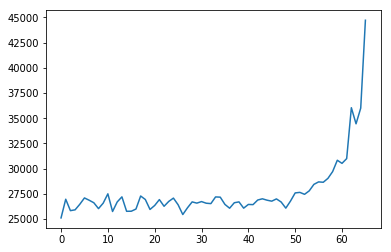

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rms)

In [72]:
#не растет, резко уменьшается от снижения кол-ва факторов после некоторого порога

In [73]:
model.fit(X,Y)
model.score(X,Y)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.8914291282765961

In [74]:
#при сипользовании рандомного леса можно не выделять тест, и оценивать по ошибке out of box, но она часто занижена

In [75]:
model.oob_score_

0.7324395083900852

In [76]:
#делаем кросс-валидацию

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
results = -cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

In [78]:
results

array([1.00919658e+09, 5.31147115e+08, 1.26320728e+09, 1.47847463e+09,
       9.35769703e+08, 9.46238128e+08, 5.31846791e+08, 2.47428038e+09,
       6.40835291e+08, 7.56912635e+08])

In [79]:
y_predict=model.predict(X_train_test)
rms_forest = np.round(sqrt(mean_squared_error(np.log(Y_train_test), np.log(y_predict))), 2)

In [80]:
rms_forest

0.14

In [81]:
#выводим важность факторов

In [82]:
for i in range(len(X.columns.tolist())):
    print('{}:{}'.format(X.columns.tolist()[i],model.feature_importances_[i]))

GarageCars:0.07538752899423531
PoolQC coded:0.0
Street coded:0.0
GrLivArea:0.14168284010348603
Condition2 coded:0.0
PavedDrive coded:0.0
RoofMatl coded:0.0
SaleCondition coded:0.0022116431083172793
RoofStyle coded:0.0
Heating coded:0.0
GarageType coded:0.005399076946718724
Utilities coded:0.0
GarageFinish coded:0.0010278569596922477
LowQualFinSF:0.0
BsmtHalfBath:0.0
BsmtFinType1 coded:0.0016130348216778548
Fireplaces:0.0009533233007268114
3SsnPorch:0.0
EnclosedPorch:0.0001609062615204662
KitchenAbvGr:0.0018972501917282187
OpenPorchSF:0.005013076908342786
LotArea:0.013081437273375828
WoodDeckSF:0.0020326426729605
HouseStyle coded:0.0010399620425030186
MiscFeature coded:0.0
Alley coded:0.0
GarageCond coded:0.0010165404569307578
ExterQual coded:0.15006560024186943
ScreenPorch:0.0
PoolArea:0.0
HeatingQC coded:0.0031702340192151872
LandSlope coded:0.000629842115059704
LotFrontage:0.01200498881641221
TotalBsmtSF:0.0681756475828208
MSSubClass:0.0027978063326259727
BsmtFinSF2:8.001196840813647

In [83]:
#Стекинг

In [84]:
regr=[]
from sklearn import  linear_model
regr1 = linear_model.LinearRegression()
regr.append(regr1)
from sklearn.tree import DecisionTreeRegressor
parameters2 = {'max_depth':[2,3,4,5,6,7,8,9,10],'max_features':[0.33, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
model_best2 = GridSearchCV(DecisionTreeRegressor(), parameters2, cv=10, n_jobs=-1)
model_best2.fit(X, Y)
best=model_best2.best_params_
regr2=DecisionTreeRegressor(max_depth=best['max_depth'], max_features=best['max_features'])
regr.append(regr2)
from sklearn.neighbors import KNeighborsRegressor
regr3= KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
regr.append(regr3)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [85]:
meta_train=np.array([0.]*len(Y))
from sklearn.model_selection import StratifiedKFold
stack_cv = StratifiedKFold(n_splits=10, random_state=555)

In [86]:
Y_class=[]
for i in Y:
    if i>np.mean(Y)*1.33:
        Y_class.append(1)
    else:
        if i<np.mean(Y)*0.67:
            Y_class.append(-1)
        else:
            Y_class.append(0)

In [87]:
def meta_features(regr):
    for_meta_test=[]
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X, Y_class)):
        regr.fit(X.iloc[train_ind], Y.iloc[train_ind])
        meta_train[test_ind] = regr.predict(X.iloc[test_ind])
        for_meta_test.append(regr.predict(X_train_test))
    for_meta_test_T=np.array(for_meta_test).T
    for i in for_meta_test_T:
        meta_test.append(sum(i)/10)
    return meta_train, meta_test

In [88]:
meta_train_list=[]
meta_test_list=[]
for i in regr:
    meta_test=[]
    meta_features(i)
    a=meta_train.copy()
    meta_train_list.append(a)
    meta_test_list.append(meta_test)

In [89]:
X_meta_train = pd.DataFrame(np.stack(meta_train_list, axis=1), columns=['lin', 'dt', 'km'])
X_meta_test = pd.DataFrame(np.stack(meta_test_list, axis=1), columns=['lin', 'dt', 'km'])

In [90]:
import xgboost

In [91]:
model_emb=xgboost.XGBRegressor()
model_emb.fit(X_meta_train, Y)
y_predlin=model_emb.predict(X_meta_test)
ens_xgb=np.round(sqrt(mean_squared_error(np.log(Y_train_test), np.log(y_predlin))), 2)

In [92]:
ens_xgb

0.15

In [93]:
regr1.fit(X,Y)
y_pred1=regr1.predict(X_train_test)
y_predict1=[i if i>0 else 1 for i in y_pred1]
mistake1=np.round(sqrt(mean_squared_error(np.log(Y_train_test), np.log(y_predict1))), 2)

In [94]:
mistake1

1.48

In [96]:
regr2.fit(X,Y)
y_predict2=regr2.predict(X_train_test)
mistake2=np.round(sqrt(mean_squared_error(np.log(Y_train_test), np.log(y_predict2))), 2)

In [97]:
mistake2

0.18

In [99]:
regr3.fit(X,Y)
y_predict3=regr3.predict(X_train_test)
mistake3=np.round(sqrt(mean_squared_error(np.log(Y_train_test), np.log(y_predict3))), 2)

In [100]:
mistake3

0.23